### Calculating and Plotting Density of States

First read in the force constants

In [65]:
from euphonic import ForceConstants

fc = ForceConstants.from_castep('castep_files/quartz.castep_bin')

# You could also try plotting a DOS for NaCl from Phonopy force constants
#fc = ForceConstants.from_phonopy(summary_name='phonopy_files/phonopy_nacl.yaml')

Now generate a grid of q-points using the `mp_grid` helper function.

Then `calculate_qpoint_phonon_modes` can be used to interpolate the
force constants to create a `QpointPhononModes` object containing
all the frequencies and eigenvectors at those q-points.

In [66]:
from euphonic.util import mp_grid

qgrid = mp_grid([6,6,6])
phonons = fc.calculate_qpoint_phonon_modes(qgrid)

Now we need to create a Numpy array of energy bins with the correct units.
The array can be created with `Numpy.arange`, and the units can be applied
using `euphonic.ureg`.

Then we can call `calculate_dos` to create a density of states.

In [67]:
import numpy as np
from euphonic import ureg

ebin_width = 0.1
energy_bins = np.arange(0, 160, ebin_width)*ureg('meV')
dos = phonons.calculate_dos(energy_bins)

`dos` is a `Spectrum1D` object, and can be plotted with the following:

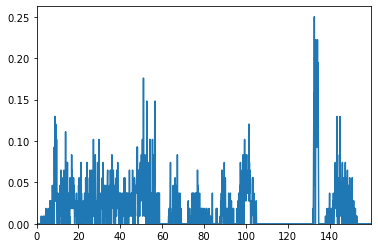

In [68]:
from euphonic.plot import plot_1d

fig = plot_1d(dos, y_min=0)

`Spectrum1D` objects can also be broadened with their `broaden`
function, which returns a new `Spectrum1D` object:

In [69]:
ewidth = 1.0*ureg('meV')
dos_broaden = dos.broaden(ewidth, shape='lorentz')

Multiple `Spectrum1D` objects can be plotted on
the same axes by passing them as a list:

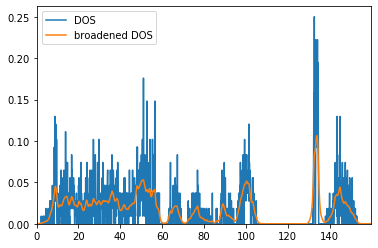

In [70]:
fig = plot_1d([dos, dos_broaden], y_min=0,
              labels=['DOS', 'broadened DOS'])

We can also try changing the `dos` energy units, which
will be reflected in the plot. The units used for the
plot are determined by the first `Spectrum1D` object
in the list

In [71]:
dos.x_data_unit = '1/cm'

`pint.Quantity` objects which are used to store data with
units in Euphonic support pretty printing, so this can
be used to automatically generate axis labels with the
correct units, as seen in the `x_label` argument to `plot_1d`

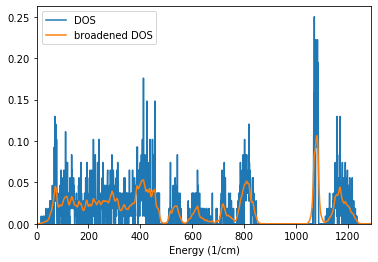

In [72]:
fig = plot_1d([dos, dos_broaden], y_min=0,
              labels=['DOS', 'broadened DOS'],
              x_label=f'Energy ({dos.x_data.units:~P})')